In [2]:
%matplotlib inline
import re
import os
import sys
#for plotting
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random as r

In [14]:
# %load '../quecc_scripts.py'
# fuctions for paper figures
# Function defs
def extract_from_file(_fname):
    res = {}
    with open(_fname,'r') as of:
        res['has_data_fixed_mode'] = False
        res['has_data_normal_mode'] = False
        for line in of:
            
            cline = line.strip()
            #extract thread_cnt
            m = re.search('g_thread_cnt\s+(\d+)', cline)
            if m:
                res['g_thread_cnt'] = m.group(1)
            #extraxct zipf_theta
            m = re.search('g_zipf_theta\s+(\d+\.\d+)', cline)
            if m:
                res['g_zipf_theta'] = m.group(1)      
                
            m = re.search('g_req_per_query\s+(\d+)', cline)
            if m:
                res['g_req_per_query'] = m.group(1)    

            m = re.search('g_txn_write_perc\s+(\d+.\d+)', cline)
            if m:
                res['g_txn_write_perc'] = m.group(1)    

            m = re.search('g_mpr\s+(\d+.\d+)', cline)
            if m:
                res['g_mpr'] = m.group(1)    
                
            m = re.search('g_max_txn_per_part\s+(\d+)', cline)
            if m:
                res['g_max_txn_per_part'] = m.group(1)    
                
            m = re.search('g_part_cnt\s+(\d+)', cline)
            if m:
                res['g_part_cnt'] = m.group(1)    
                

            #extract from Pass
            m = re.search('PASS!,(.+)', cline)
#             SimTime=26.737377,total_time=26.737377,pt_time=13.400466,et_time=13.336911,
#             total_tput=625030.625000,pt_tput=1247096.875000,et_tput=1253039.750000, 
#             txn_cnt=16711680
            if m:        
#                 print(m.group(1))
                res['has_data_fixed_mode'] = True
                sline = m.group(1).split(',')
                for a in sline:
                    asline = a.strip().split('=')
#                     if asline[0] == 'SimTime':                        
#                         print(asline[1])
                    if asline[0] == 'total_time':
#                         print('====='+asline[0]+'='+asline[1])
                        res['total_time'] = asline[1];
                    if asline[0] == 'pt_time':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'et_time':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'total_tput':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'pt_tput':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'et_tput':
                        res[asline[0]] = asline[1];
                    if asline[0] == 'txn_cnt':
                        res[asline[0]] = asline[1];
            
            #extract from summary
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                res['has_data_normal_mode'] = True
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
#                     print(i,a)
                    asline = a.split('=')
                    if asline[0] == 'total_runtime':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'tput':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'virt_mem_usage':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'phys_mem_usage':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'local_txn_start_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'local_txn_abort_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'total_txn_abort_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'local_txn_commit_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'unique_txn_abort_cnt':
                        res[asline[0]] = asline[1]
                    if asline[0] == 'fscl_avg':
                        res[asline[0]] = asline[1]                         
                    ms= re.search('fscl\d+', asline[0])
                    if ms:
                        res[asline[0]] = asline[1]  
                        
#                         print(a)
#                 print(sline[0])
#                 print(sline[1])
#                 print(sline[2])
#     print(res)
    if not res['has_data_fixed_mode']:
        res['total_time'] = '0.0';
        res['pt_time'] = '0.0';
        res['et_time'] = '0.0';
        res['total_tput'] = '0.0';
        res['pt_tput'] = '0.0';
        res['et_tput'] = '0.0';
        res['txn_cnt'] = '0';        
    if not res['has_data_normal_mode']:
        res['total_runtime'] = '0.0';
        res['tput'] = '0';
        res['virt_mem_usage'] = '0';
        res['phys_mem_usage'] = '0';
        
        
    return res;


def parse_directory(directory):
    resFiles = os.listdir(directory)
    data = {
            'cc_alg':[],
            'vm':[],
            'worker_cnt':[],
            'tput':[],
            'pa_cnt':[],
            'pa_strict':[],
            'total_tput':[],
            'commit_strategy':[],
            'batch_size':[],
            'req_cnt':[],
            'mpr':[],
            'total_txn_cnt':[],
            'txn_per_part':[],
            'part_cnt':[],
            'rec_size':[],
            'write_perc':[],
            'pt_perc':[],
            'pt_cnt':[],
            'pt_time':[],
            'pt_tput':[],
            'et_cnt':[],
            'et_tput':[],
            'et_time':[],
            'total_runtime':[],
            'total_time':[],
            'trial_no':[],
            'total_txn_abort_cnt':[],
            'local_txn_commit_cnt':[],
            'local_txn_abort_cnt':[],
            'local_txn_start_cnt':[],
            'unique_txn_abort_cnt':[],
            'seq_no':[],            
            'virt_mem_usage':[],
            'phys_mem_usage':[],
            'fscl10':[],
            'fscl25':[],
            'fscl50':[],
            'fscl75':[],
            'fscl90':[],
            'fscl95':[],
            'fscl99':[],
            'fscl100':[],
            'fscl_avg':[],
            'zipf_theta':[]
           }
    # dfcols = ['cc_alg', 'w_cnt', 'tput', 'trial_no', 'seq_no', 'zipf_theta']
    for fname in resFiles:
    #     m = re.search("(pt6_)?([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt",fname)
#         regex = "pa?(\d+)_?([A-Za-z]+)_pt(\d+)_et(\d+)_(\d+)_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
#         regex = "(pa(\d+)_)?([A-Za-z]+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
#         regex = "(pa?(\d+)_)?([A-Za-z]+|\d+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)?_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
        regex = "(pa(\d+)_)([A-Za-z]+|\d+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)?_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
        rsize_re = "(\d+)Brec_.+"
        rsize_m = re.search(rsize_re,fname)
        m = re.search(regex,fname)
        wthd_cnt = 0
        extracted_data = {}
        cc_alg = ''
        trial_num = 0
        seq_num = 0
        theta = 0.0
        pt_prec = 0
        pa_cnt = 0
        pa_s = False
#         print(fname)
        if m:
            try:
#                 print(fname)
                pa_cnt = int(m.group(2)) if m.group(2) else 0
                comm_strat = m.group(3)
                pt_cnt = int(m.group(4))
                et_cnt = int(m.group(5))
                pt_perc = int(m.group(6))
                if m.group(7) == 'pptstrict':
                    pa_s = True
                cc_alg = m.group(8)
                trial_num = m.group(10)
                seq_num = m.group(11)  
                core_cnt = int(m.group(13))
                e_data = extract_from_file(directory+'/'+fname)
                w_thd = int(e_data['g_thread_cnt'])
                if rsize_m:
                    rec_size = int(rsize_m.group(1))
                else: 
                    rec_size = 0
                data['rec_size'].append(rec_size)

        #         nodemal mode
                if (comm_strat == 'NOCOMSTRAT'):        
                    if (cc_alg == 'QUECC' and q_pipelined):
                        data['worker_cnt'].append(int(e_data['g_thread_cnt'])*2)
                    else:
                        data['worker_cnt'].append(int(e_data['g_thread_cnt']))

                if (cc_alg == 'QUECC' and q_pipelined):
                    data['worker_cnt'].append(pt_cnt+et_cnt)
                else:
                    data['worker_cnt'].append(int(e_data['g_thread_cnt']))


                #fixed-mode

        #         if (pt_perc == 100):
        #             data['worker_cnt'].append(pt_cnt)
        #         else:
        #             data['worker_cnt'].append(pt_cnt+et_cnt)
        #         data['worker_cnt'].append(int(e_data['g_thread_cnt']))
                data['cc_alg'].append(cc_alg)
                data['vm'].append(core_cnt)
                data['commit_strategy'].append(comm_strat)  
                try:
                    data['batch_size'].append(int(comm_strat))
                except ValueError:
                    data['batch_size'].append(0)
                        

                if (e_data['has_data_fixed_mode']):
                    data['total_time'].append(float(e_data['total_time']))
                    data['total_tput'].append(float(e_data['total_tput']))
                    data['total_runtime'].append(float(0))
                    data['tput'].append(float(0))
                else:
                    data['total_runtime'].append(float(e_data['total_runtime']))
                    data['tput'].append(float(e_data['tput']))
                    data['total_time'].append(float(0))
                    data['total_tput'].append(float(0))            

                data['virt_mem_usage'].append(int(e_data['virt_mem_usage']))
                data['phys_mem_usage'].append(int(e_data['virt_mem_usage']))
                data['pa_cnt'].append(int(pa_cnt))
                data['pa_strict'].append(pa_s)
                data['pt_perc'].append(pt_perc)
                data['pt_cnt'].append(pt_cnt)
                data['pt_time'].append(float(e_data['pt_time']))
                data['pt_tput'].append(float(e_data['pt_tput']))
                data['et_cnt'].append(et_cnt)
                data['et_time'].append(float(e_data['et_time']))
                data['et_tput'].append(float(e_data['et_tput']))
                data['trial_no'].append(int(trial_num))
                pcnt = int(e_data['g_part_cnt']);
                tpp = int(e_data['g_max_txn_per_part'])
                data['total_txn_cnt'].append(pcnt*tpp)
                data['part_cnt'].append(pcnt)
                data['txn_per_part'].append(tpp)
                data['seq_no'].append(int(seq_num))
                data['req_cnt'].append(int(e_data['g_req_per_query']))
                data['mpr'].append(float(e_data['g_mpr']))
                data['write_perc'].append(float(e_data['g_txn_write_perc']))                
                data['zipf_theta'].append('{:.2f}'.format(float(e_data['g_zipf_theta'])))
                data['local_txn_start_cnt'].append(int(e_data['local_txn_start_cnt']))
                data['local_txn_abort_cnt'].append(int(e_data['local_txn_abort_cnt']))
                data['total_txn_abort_cnt'].append(int(e_data['total_txn_abort_cnt']))
                data['local_txn_commit_cnt'].append(int(e_data['local_txn_commit_cnt']))
                data['unique_txn_abort_cnt'].append(int(e_data['unique_txn_abort_cnt']))
                data['fscl10'].append(float(e_data['fscl10']))  
                data['fscl25'].append(float(e_data['fscl25']))  
                data['fscl50'].append(float(e_data['fscl50']))  
                data['fscl75'].append(float(e_data['fscl75']))  
                data['fscl90'].append(float(e_data['fscl90']))  
                data['fscl95'].append(float(e_data['fscl95']))  
                data['fscl99'].append(float(e_data['fscl99']))  
                data['fscl100'].append(float(e_data['fscl100']))  
                data['fscl_avg'].append(float(e_data['fscl_avg'])) 
                
            except KeyError:
                print(fname)
    return data
                
def view_planner_from_file(_fname):
    res = {}
    with open(_fname,'r') as of:
        for line in of:
            cline = line.strip()
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
                    mq = re.search('quecc\_plan(\d+)\_(\w+)=(-?\d+\.?\d*)', a)
                    if mq:
                        row = [mq.group(1), mq.group(2), mq.group(3)]
                        key = mq.group(2)
                        if key in res.keys():
                            res[mq.group(2)].append(float(mq.group(3)))
                        else:
                            res[mq.group(2)] =[float(mq.group(3))]
#                         print(row)
#                         print(a)
#                 print(sline[0])
#                 print(sline[1])
#                 print(sline[2])
#     print(res)
    return res;

def plot_planner_times(df):
    # Create the general blog and the "subplots" i.e. the bars
    f, ax1 = plt.subplots(1, figsize=(16,5))

    # Set the bar width
    bar_width = 0.40

    colors = ['#d7191c','#fdae61','#abdda4','#2b83ba']


    # positions of the left bar-boundaries
    bar_l = [i-(bar_width) for i in range(len(df['idle_time']))]

    # positions of the x-axis ticks (center of the bars as bar labels)
    # tick_pos = [(i-1)+(bar_width/2) for i in bar_l]

    # Create a bar plot, in position bar_1
    ax1.bar(bar_l,
            df['idle_time'],
            # set the width
            width=bar_width,
            # with the label pre score
            label='Idle time',
            # with alpha 0.5
            alpha=0.5,
            # with color
            color=colors[0])

    # Create a bar plot, in position bar_1
    ax1.bar(bar_l,
            # using the mid_score data
            df['queue_dequeue_time'],
            # set the width
            width=bar_width,
            # with pre_score on the bottom
            bottom=df['idle_time'],
            # with the label mid score
            label='Deq. time',
            # with alpha 0.5
            alpha=0.5,
            # with color
            color=colors[1])

    # Create a bar plot, in position bar_1
    all_df = (df['idle_time'],df['queue_dequeue_time'])
    ax1.bar(bar_l,
            # using the post_score data
            df['txn_proc_time'],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='Txn proc. time',
            # with alpha 0.5
            alpha=0.5,
            # with color
            color=colors[2])
    all_df = (df['idle_time'],df['queue_dequeue_time'], df['txn_proc_time'])
    ax1.bar(bar_l,
            # using the post_score data
            [60-(i+j+k) for i,j,k in zip(df['idle_time'],df['queue_dequeue_time'], df['txn_proc_time'])],
            # set the width
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            # with the label post score
            label='Other times',
            # with alpha 0.5
            alpha=0.5,
            # with color
            color='#000000')

    # set the x ticks with names
    plt.xticks(bar_l,['Planner_'+str(i) for i in range(len(df['idle_time']))], rotation=45)

    # Set the label and legends
    ax1.set_ylabel("Run Time")
    ax1.set_xlabel("Planner threads")
    # plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=3, mode="expand", borderaxespad=0.)
## end -- def plot_planner_times(df):
def plot_exec_times_hl_pip(df):
    f, ax1 = plt.subplots(1, figsize=(15,5))

    # Set the bar width
    bar_width = 0.75

    colors = ['#CCCCCC','#fc8d59','#fee08b','#e6f598','#99d594','#d53e4f', '#3288bd']

    # positions of the left bar-boundaries

    bar_l = [i-(0.75) for i in range(len(df['wt_hl_exec_time']))]    
    # wt_hl_plan_time
#     ax1.bar(bar_l,
#             df['wt_hl_plan_time'],
#             width=bar_width,
#             label='Batch Planning time',
#             color=colors[0], hatch='//')

#     # sync plan
#     ax1.bar(bar_l,
#             df['wt_hl_sync_plan_time'],
#             width=bar_width,
#             bottom=df['wt_hl_plan_time'],
#             label='Sync after planning stage',
#             color=colors[1])

    # exec time
    plan_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time'])
    ax1.bar(bar_l,
            df['wt_hl_exec_time'],
            width=bar_width,
            label='Batch exec time',
            color=colors[2], hatch='\\')
    
    # sync_exec
    all_df = (df['wt_hl_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after exec. stage',
            color=colors[3])
    
    # txn_commit_time
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch Commit time',
            color=colors[4], hatch='|')
    
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after commit stage',
            color=colors[5])
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time'])
    ax1.bar(bar_l,
        df['wt_hl_cleanup_time'],
        width=bar_width,
        bottom=all_df,
        label='Cleanup time',
        color=colors[0], hatch='**')
        
    all_df = (df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time']+
              df['wt_hl_cleanup_time'])

#     ax1.bar(bar_l,
#             (df['exec_batch_proc_time']-all_df),
#             width=bar_width,
#             # with pre_score and mid_score on the bottom
#             bottom=all_df,
#             label='Other unmeasured times',
#             color=colors[6], hatch='++')

    # set the x ticks with names
    plt.xticks(bar_l,['ET_'+str(i) for i in range(len(df['wt_hl_plan_time']))], rotation=45)

    # Set the label and legends
    ax1.set_ylabel("Run Time")
    ax1.set_xlabel("Execution threads")
    # plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=3, mode="expand", borderaxespad=0.)

def plot_exec_times_hl_unpip(df):
    f, ax1 = plt.subplots(1, figsize=(15,5))

    # Set the bar width
    bar_width = 0.75

    colors = ['#CCCCCC','#fc8d59','#fee08b','#e6f598','#99d594','#d53e4f', '#3288bd']

    # positions of the left bar-boundaries

    bar_l = [i-(0.75) for i in range(len(df['wt_hl_plan_time']))]    
    # wt_hl_plan_time
    ax1.bar(bar_l,
            df['wt_hl_plan_time'],
            width=bar_width,
            label='Batch Planning time',
            color=colors[0], hatch='//')

    # sync plan
    ax1.bar(bar_l,
            df['wt_hl_sync_plan_time'],
            width=bar_width,
            bottom=df['wt_hl_plan_time'],
            label='Sync after planning stage',
            color=colors[1])

    # exec time
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time'])
    ax1.bar(bar_l,
            df['wt_hl_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch exec time',
            color=colors[2], hatch='\\')
    
    # sync_exec
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
          df['wt_hl_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after exec. stage',
            color=colors[3])
    
    # txn_commit_time
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
          df['wt_hl_exec_time']+df['wt_hl_sync_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch Commit time',
            color=colors[4], hatch='|')
    
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after commit stage',
            color=colors[5])
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time'])
    ax1.bar(bar_l,
        df['wt_hl_cleanup_time'],
        width=bar_width,
        bottom=all_df,
        label='Cleanup time',
        color=colors[0], hatch='**')
        
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time']+
              df['wt_hl_cleanup_time'])

    ax1.bar(bar_l,
            (df['exec_batch_proc_time']-all_df),
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            label='Other unmeasured times',
            color=colors[6], hatch='++')

    # set the x ticks with names
    plt.xticks(bar_l,['ET_'+str(i) for i in range(len(df['wt_hl_plan_time']))], rotation=45)

    # Set the label and legends
    ax1.set_ylabel("Run Time")
    ax1.set_xlabel("Execution threads")
    # plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=3, mode="expand", borderaxespad=0.)
    
def plot_abort_rate(ax, line_labels, line_ayvals, xlabel):
    ax = plt.subplot(111)
    for i in range(len(line_labels)):
    #     ls_tmp = ls[i]
        ls_tmp = ls_dict[line_labels[i]]
        ax.plot(xticks,line_ayvals[i], marker=ls_tmp['marker'], linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
#         ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f'))
#         ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))
        ax.set_ylabel('Abort Rate')
        ax.set_xlabel(xlabel)
        ax.margins(0.0) 
    return ax;
               

In [9]:
sfont = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

agg_params = {'wt_hl_plan_time':'mean',
            'wt_hl_sync_plan_time':'mean',
            'wt_hl_exec_time':'mean',
            'wt_hl_sync_exec_time':'mean',
            'wt_hl_commit_time':'mean',
            'wt_hl_sync_commit_time':'mean',
            'wt_hl_cleanup_time':'mean',
            'exec_batch_proc_time':'mean',
            'tput':'mean'
           }
    
def exetract_breakdown_from_file(_fname):
    res = {}
    with open(_fname,'r') as of:
        for line in of:
            cline = line.strip()
            m = re.search('g_thread_cnt\s+(\d+)', cline)
            if m:
                res['g_thread_cnt'] = int(m.group(1))
            m = re.search('(\[summary\]) (.+)', cline)
            if m:
                sline = m.group(2).split(',')
                for i, a in enumerate(sline):
                    asline = a.split('=')
                    if asline[0] == 'tput':
                        res[asline[0]] = float(asline[1])
                    if asline[0] == 'fscl_avg':
                        res[asline[0]] = float(asline[1])
#                     print(i,a)
#                     if i == 1:
#                         asline = a.split('=')
#                         res[asline[0]] = asline[1]
#                     mq = re.search('quecc\_exec(\d)\_(\w+)=(\d+\.?\d*)', a)
                    mq = re.search('quecc\_?(exec|plan|wt)(\d+)\_(\w+)=(\d+\.?\d*)', a)
                    if mq:
#                         res['index'].append(int(i))
                        key = "{}_{}".format(mq.group(1),mq.group(3))
                        
                        row = [mq.group(2), key, mq.group(4)]
                        if key in res.keys():
                            res[key].append(float(mq.group(4)))
                        else:
                            res[key] =[float(mq.group(4))]
#                         print(row)
#                         print(a)
#                 print(sline[0])
#                 print(sline[1])
#                 print(sline[2])
#     print(res)
    return res;
dir1 = '/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_final_theta0pt8_wtvar_lat_quecc_GS32'
resFiles = os.listdir(dir1)
i = 0
for fn1 in resFiles:    
    regex = "(pa(\d+)_)([A-Za-z]+|\d+)_pt(\d+)_et(\d+)_(\d+)_?(pptstrict|pptnonstrict)?_([A-Za-z]+)_(c|s)_t(\d+)_(\d+)(_(\d+))?.txt"
    rsize_re = "(\d+)Brec_.+"
    
    m = re.search(regex,fn1)
    if m:
        print(fn1)
        time_data = exetract_breakdown_from_file(dir1+"/"+fn1)
        df = pd.DataFrame(time_data)
    #     print(df)
    #     print(df['g_thread_cnt'])
        
        df = df.groupby('g_thread_cnt').agg(agg_params)
        if i == 0:
            combined = df
        else:
            combined = pd.concat([combined,df])
        i = i + 1
        
        
def plot_exec_times_hl_wt_agg(df):
    f, ax1 = plt.subplots(1, figsize=(8,4))
#     f, ax1 = plt.subplots(1)

    # Set the bar width
    bar_width = 0.75

    colors = ['#CCCCCC','#fc8d59','#fee08b','#e6f598','#99d594','#d53e4f', '#3288bd']

    # positions of the left bar-boundaries

    bar_l = [i-(0.75) for i in range(len(df['wt_hl_plan_time']))]    
    # wt_hl_plan_time
    ax1.bar(bar_l,
            df['wt_hl_plan_time'],
            width=bar_width,
            label='Batch Planning time',
            color=colors[0], hatch='//')

    # sync plan
    ax1.bar(bar_l,
            df['wt_hl_sync_plan_time'],
            width=bar_width,
            bottom=df['wt_hl_plan_time'],
            label='Sync after planning stage',
            color=colors[1])

    # exec time
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time'])
    ax1.bar(bar_l,
            df['wt_hl_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch exec time',
            color=colors[2], hatch='\\')
    
    # sync_exec
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
          df['wt_hl_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_exec_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after exec. stage',
            color=colors[3])
    
    # txn_commit_time
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
          df['wt_hl_exec_time']+df['wt_hl_sync_exec_time'])
    ax1.bar(bar_l,
            df['wt_hl_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Batch Commit time',
            color=colors[4], hatch='|')
    
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time'])
    ax1.bar(bar_l,
            df['wt_hl_sync_commit_time'],
            width=bar_width,
            bottom=all_df,
            label='Sync after commit stage',
            color=colors[5])
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time'])
    ax1.bar(bar_l,
        df['wt_hl_cleanup_time'],
        width=bar_width,
        bottom=all_df,
        label='Cleanup time',
        color=colors[0], hatch='**')
        
    all_df = (df['wt_hl_plan_time']+df['wt_hl_sync_plan_time']+
              df['wt_hl_exec_time']+df['wt_hl_sync_exec_time']+
              df['wt_hl_commit_time']+df['wt_hl_sync_commit_time']+
              df['wt_hl_cleanup_time'])

    ax1.bar(bar_l,
            (df['exec_batch_proc_time']-all_df)/60,
            width=bar_width,
            # with pre_score and mid_score on the bottom
            bottom=all_df,
            label='Other unmeasured times',
            color=colors[6], hatch='++')

    # set the x ticks with names
#     plt.xticks(bar_l,['ET_'+str(i) for i in range(len(df['wt_hl_plan_time']))], rotation=45)
    plt.xticks(bar_l,combined.index.get_level_values(0))
    print(bar_l)
    ylabels = []
    ylabelvs = []
    for v in bar_l:
        l = (v + 0.75)/4.0
        ylabels.append(l)
        ylabelvs.append(l*60)
#     print(ylabels)
    plt.yticks(ylabelvs,ylabels)
    # Set the label and legends
    ax1.set_ylabel("Run Time (normalized)")
    ax1.set_xlabel("Number of worker threads")
    # plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(1.02, 1.02, 0.4, -.4), loc=2,
               ncol=1, mode="expand", borderaxespad=0.)
    plt.tight_layout()

    figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/QueCC/paper_figs/'
    outfname = '{}ycsb-wtvar-tbreak-GS32.pdf'.format(figoutdir)
    plt.savefig(outfname,format='pdf')

combined = combined.groupby('g_thread_cnt').agg(agg_params)
plot_exec_times_hl_wt_agg(combined)
combined

FileNotFoundError: [Errno 2] No such file or directory: '/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_final_theta0pt8_wtvar_lat_quecc_GS32'

/Users/qadahtm/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


tput  phys_mem_usage  \
cc_alg    zipf_theta pt_perc worker_cnt                                
MVCC      0.00       100     32         1,518,639.03       111519036   
          0.30       100     32         1,515,766.89       111781180   
          0.60       100     32         1,423,296.37       112043324   
          0.80       100     32                 0.00        12907836   
          0.99       100     32                 0.01        11023676   
NOWAIT    0.00       100     32         2,343,391.86       133072184   
          0.30       100     32         2,337,451.30       133066040   
          0.60       100     32         2,289,704.01       132744504   
          0.80       100     32         1,782,380.28       122082616   
          0.99       100     32           201,407.90        51713336   
OCC       0.00       100     32           326,771.31        37422392   
          0.30       100     32           327,753.36        37377336   
          0.60       100     32           322,816.84        37778744   
          0.80       100     32           295,920.60        37377336   
          0.99       100     32            29,939.70        28132664   
QUECC     0.00       100     32         2,751,285.83        11036850   
          0.30       100     32         3,018,557.81        11036850   
          0.60       100     32         2,992,459.44        11036850   
          0.80       100     32         3,100,636.76        11045042   
          0.99       100     32         2,419,536.59        11045042   
SILO      0.00       100     32         2,311,696.51       130925880   
          0.30       100     32         2,306,736.89       130913592   
          0.60       100     32         2,271,290.68       130882872   
          0.80       100     32         2,007,039.49       120204600   
          0.99       100     32           644,942.63        69455160   
TIMESTAMP 0.00       100     32         2,150,234.61       131069244   
          0.30       100     32         2,135,357.25       130389308   
          0.60       100     32         2,108,924.37       126364988   
          0.80       100     32             2,617.27        40445244   
          0.99       100     32               522.14        17849660   
WAITDIE   0.00       100     32         1,995,758.69       111662396   
          0.30       100     32         1,993,870.19       111662396   
          0.60       100     32         1,989,723.35       111662396   
          0.80       100     32                 1.43        37397820   
          0.99       100     32                 2.06        31427900   

                                         trial_no  local_txn_start_cnt  \
cc_alg    zipf_theta pt_perc worker_cnt                                  
MVCC      0.00       100     32                 2        91,118,313.50   
          0.30       100     32                 2        90,946,005.50   
          0.60       100     32                 2        85,397,749.00   
          0.80       100     32                 2                 0.00   
          0.99       100     32                 2               621.00   
NOWAIT    0.00       100     32                 2       140,603,487.00   
          0.30       100     32                 2       140,247,057.00   
          0.60       100     32                 2       137,382,196.50   
          0.80       100     32                 2       106,936,378.00   
          0.99       100     32                 2        12,078,088.00   
OCC       0.00       100     32                 2        19,606,254.00   
          0.30       100     32                 2        19,665,170.50   
          0.60       100     32                 2        19,368,972.00   
          0.80       100     32                 2        17,754,841.00   
          0.99       100     32                 2         1,798,145.50   
QUECC     0.00       100     32                 2                 0.00   
          0.30       100     32                 2  

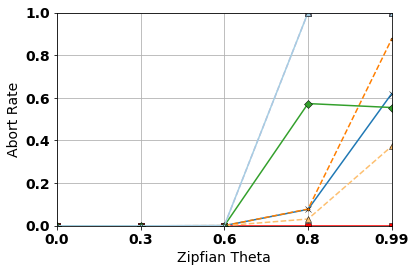

In [13]:
##QueCC Plots -- ThetaVar - Throughput
import matplotlib.ticker as ticker  
agg_req_normal = {'tput':'mean','phys_mem_usage':'mean', 'trial_no':'count','local_txn_start_cnt':'mean',
                  'total_txn_abort_cnt':'mean', 'local_txn_commit_cnt':'mean', 'abort_rate':'mean'}
agg_req = agg_req_normal
us = 1000000
q_pipelined = False
pd.options.display.float_format = '{:,.2f}'.format
grp_indexes = ['cc_alg','zipf_theta','pt_perc','worker_cnt']
# cores = 32
cores = 64
figoutdir = '/Users/qadahtm/Google Drive/MBP2/PhDResearch/QueCC/paper_figs/'
# outfname = '{}ycsb-thetavar-GS32.pdf'.format(figoutdir)
outfname = '{}ycsb-thetavar-arate-GS32.pdf'.format(figoutdir)

# ycsb_final_thetavar_quecc_GS32
# ycsb_final_thetavar_set1_GS32
# ycsb_final_thetavar_set2_GS32

# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_thetavar_quecc_ctall_GS32"
ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_thetavar_quecc_ct8_GS32"
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_thetavar_quecc_ct16_GS32"
# ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/nov_exps/ycsb_final_thetavar_quecc_GS32"
ycsb_df = pd.DataFrame(parse_directory(ycsb_data));
ycsb_df = ycsb_df[ycsb_df['worker_cnt'] == 32]
ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_thetavar_others_GS32"
ycsb_df = pd.concat([ycsb_df,pd.DataFrame(parse_directory(ycsb_data))]);
ycsb_data = "/Users/qadahtm/Dev/halstead/deneva_project/deneva/exp_results/ycsb_thetavar_quecc_ct8_1_GS32"
ycsb_df = pd.concat([ycsb_df,pd.DataFrame(parse_directory(ycsb_data))]);

# ycsb_df = ycsb_df[ycsb_df['cc_alg'] != 'MVCC']
# ycsb_df = ycsb_df[ycsb_df['tput'] != 0]

combined = ycsb_df
combined['abort_rate'] = (combined['total_txn_abort_cnt'])/(combined['total_txn_abort_cnt']+combined['local_txn_commit_cnt'])
combined.loc[combined['cc_alg'] == 'QUECC','abort_rate'] = 0.0
grouped_f = combined.groupby(grp_indexes).agg(agg_req)

# plt.figure(figsize=(32,6.2))
# plt.figure(figsize=(16,10))
# plt.figure(figsize=(6.4,4.8))
plt.figure()
# plt.rc('grid', linestyle="--")
plt.grid(True)
# plt.set_cmap('Dark2')
# plt.set_cmap('spectral')

algs = list(grouped_f.index.levels[0])
# print(grouped_f.index)
# grouped_f.reindex(['GS32', 'M64', 'M128'])
ztheta = list(grouped_f.index.levels[1])
pt_ratio = list(grouped_f.index.levels[2])
vm_cnt = list(grouped_f.index.levels[0])
# print(ztheta)
pc =0
# print(algs)
# print(ztheta)
doplot = True
line_labels = []
line_yvals = []
line_ayvals = []
line_xvals = []
line_theta = []
ptr = 100
for a in algs:
    ll = a
    line_labels.append(ll)
    yvals = list(grouped_f.loc[a]['tput'])
    ayvals = list(grouped_f.loc[a]['abort_rate'])
    xvals = list(grouped_f.loc[a].index.get_level_values(0))
    xvals = list( map(lambda x : float(x), xvals))
    yvals_s = list( map(lambda x : x/us, yvals))

#     print(yvals)
#             print(xvals)
    line_yvals.append(yvals_s)
    line_ayvals.append(ayvals)
    line_xvals.append(xvals)
#     line_theta.append(t)

doplot = True

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

# if doplot:
# pc = pc + 1
plti = 110 + pc
# print(plti)
#     print(len(line_yvals))
title_y_offset = -0.2
xticks = list(range(len(line_xvals[0])))

ax = plt.subplot(111)
# ax.set_ylim([0,3.12])
# for i in range(len(line_labels)):
# #     ls_tmp = ls[i]
#     ls_tmp = ls_dict[line_labels[i]]
#     ax.plot(xticks,line_yvals[i], marker=ls_tmp['marker'], linestyle=ls_tmp['linestyle'], color=ls_tmp['color'], markeredgewidth=0.5,markeredgecolor='black', label=line_labels[i])
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.1f'))
#     ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f'))
#     ax.set_ylabel('Throughput (Million TPS)')
#     ax.set_xlabel('Zipfian Theta')
#     ax.margins(0.0) 


ax = plot_abort_rate(ax, line_labels, line_ayvals,'Zipfian Theta')
plt.xticks(xticks,line_xvals[0])
# plt.yticks(fontsize=12)
lgdfont = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

# lgd = plt.legend(bbox_to_anchor=(-.2, 1.02, 3.4, .102), 
#            loc=8,ncol=12, mode="expand", borderaxespad=0.,prop=lgdfont)
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
#                     wspace=0.35)
plt.grid(True)
plt.tight_layout()
# plt.savefig(outfname,format='pdf',bbox_extra_artists=(lgd), bbox_inches='tight')
plt.savefig(outfname,format='pdf', bbox_inches='tight')
grouped_f
# combined[combined['cc_alg'] == 'QUECC']['abort_rate']